In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import glob
import os
import re
import pandas as pd
import tarfile
import P4J
from astropy.table import Table
from astropy.stats import sigma_clip
from astropy.cosmology import FlatLambdaCDM
from matplotlib.ticker import MaxNLocator
from astroML.time_series import ACF_scargle, ACF_EK
from statsmodels.tsa.stattools import acf
#import PrettyTable as pt

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style="ticks", color_codes=True, context="notebook", font_scale=1.4)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

mainpath = '/Users/jorgetil/Astro/HITS'

In [2]:
def give_me_lc(field, CCD, X, Y, extract=False):
    year = field[:-3]
    try:
        #print "%s/lightcurves/%s/%s/%s/%s_%s_LC_50.tar.gz" % (mainpath, field[:-3], field, CCD, field, CCD)
        tar = tarfile.open("%s/lightcurves/%s/%s/%s/%s_%s_LC_50.tar.gz" 
                           % (mainpath, field[:-3], field, CCD, field, CCD))
        fil = tar.extractfile('%s_%s_%s_%s_g.dat' % (field, CCD, X, Y))
        if extract:
            tar.extract('%s_%s_%s_%s_g.dat' % (field, CCD, X, Y),
                    path='%s/lightcurves/examples/.' % mainpath)
    except:
        print 'No tar file or element in tar file'
        return None
    
    time, mag, err, epoch = [], [], [], []
    for line in fil:
        if line[0] == '#': continue
        values = line.split()
        epoch.append(float(values[0]))
        time.append(float(values[1]))
        mag.append(float(values[2]))
        err.append(float(values[3]))
    time = np.array(time)
    mag= np.array(mag)
    err = np.array(err)
    epoch = np.array(epoch)
    
    return time, mag, err, epoch

In [13]:
# load feature table into DF
qso_file = '%s/tables/HiTS_labeled.csv' % (mainpath)
qso = pd.read_csv(qso_file)
qso.set_index('internalID', inplace=True)

/Users/jorgetil/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Blind14A_39_S20_1337_3806 raMedian     173.202807
decMedian     -1.542679
Name: Blind14A_39_S20_1337_3806, dtype: float64
raMedian            173.203
decMedian          -1.54268
X                   1337.41
Y                    3806.1
Var_Type                 NV
Mean                16.7179
Amplitude        0.00232387
Std              0.00148582
MedianAbsDev     0.00122169
Meanvariance    8.88757e-05
Eta_e                7.8435
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.965762
PeriodLS         0.00813106
Name: Blind14A_39_S20_1337_3806, dtype: object


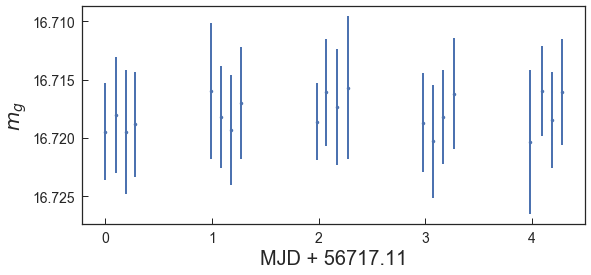

Blind14A_25_N27_1437_1492 raMedian     165.339569
decMedian     -4.963440
Name: Blind14A_25_N27_1437_1492, dtype: float64
raMedian             165.34
decMedian          -4.96344
X                   1437.28
Y                   1492.09
Var_Type                 NV
Mean                16.6103
Amplitude        0.00392707
Std              0.00161471
MedianAbsDev    0.000897756
Meanvariance    9.72116e-05
Eta_e               3.81921
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999996
PeriodLS         0.00650148
Name: Blind14A_25_N27_1437_1492, dtype: object


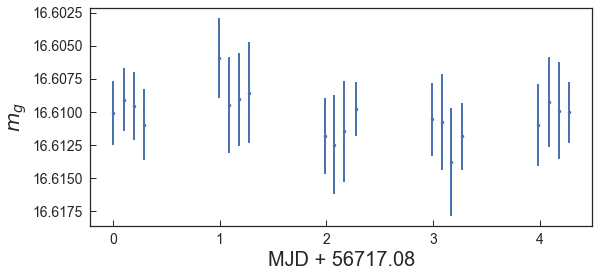

Blind14A_31_N4_1083_0825 raMedian     168.763359
decMedian     -2.182755
Name: Blind14A_31_N4_1083_0825, dtype: float64
raMedian            168.763
decMedian          -2.18275
X                   1083.26
Y                    825.77
Var_Type                 NV
Mean                16.4085
Amplitude        0.00337812
Std              0.00193354
MedianAbsDev     0.00132218
Meanvariance    0.000117837
Eta_e               9.62271
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit          0.99996
PeriodLS         0.00441857
Name: Blind14A_31_N4_1083_0825, dtype: object


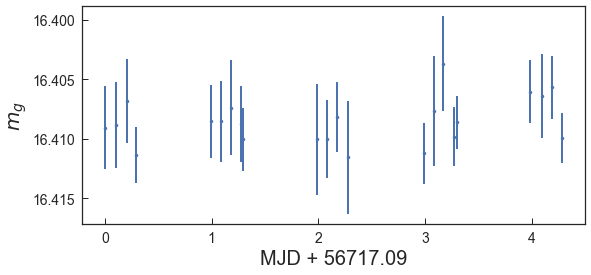

Blind14A_27_N11_1475_3630 raMedian     165.48988
decMedian     -0.28061
Name: Blind14A_27_N11_1475_3630, dtype: float64
raMedian             165.49
decMedian          -0.28061
X                   1475.95
Y                   3630.55
Var_Type                 NV
Mean                16.6863
Amplitude        0.00417068
Std              0.00194507
MedianAbsDev     0.00119789
Meanvariance    0.000116567
Eta_e               8.53542
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.980095
PeriodLS         0.00573929
Name: Blind14A_27_N11_1475_3630, dtype: object


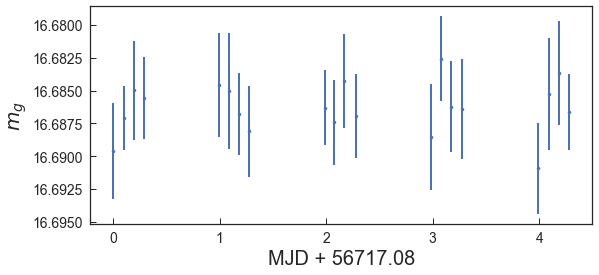

Blind14A_25_N27_1312_3450 raMedian     165.483266
decMedian     -4.954429
Name: Blind14A_25_N27_1312_3450, dtype: float64
raMedian            165.483
decMedian          -4.95443
X                   1312.05
Y                   3450.67
Var_Type                 NV
Mean                16.8792
Amplitude        0.00434306
Std              0.00203097
MedianAbsDev     0.00118261
Meanvariance    0.000120324
Eta_e               5.94712
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999832
PeriodLS         0.00637872
Name: Blind14A_25_N27_1312_3450, dtype: object


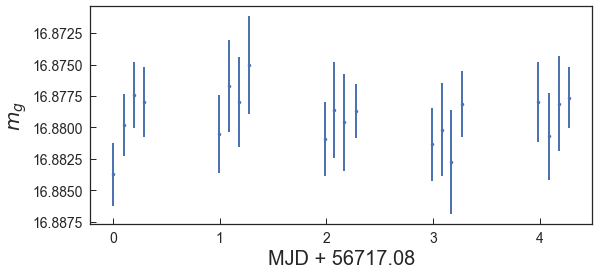

Blind14A_25_N6_0961_2764 raMedian     165.901067
decMedian     -4.271077
Name: Blind14A_25_N6_0961_2764, dtype: float64
raMedian            165.901
decMedian          -4.27108
X                   961.597
Y                   2764.45
Var_Type                 NV
Mean                17.2783
Amplitude         0.0041872
Std               0.0020871
MedianAbsDev     0.00122993
Meanvariance    0.000120793
Eta_e               8.04486
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999956
PeriodLS         0.00521942
Name: Blind14A_25_N6_0961_2764, dtype: object


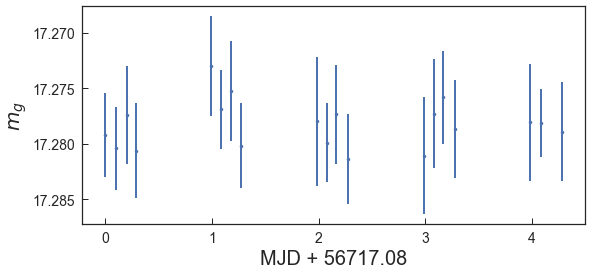

Blind14A_25_N27_1474_2524 raMedian     165.415286
decMedian     -4.966189
Name: Blind14A_25_N27_1474_2524, dtype: float64
raMedian            165.415
decMedian          -4.96619
X                   1474.01
Y                   2524.26
Var_Type                 NV
Mean                16.6495
Amplitude        0.00328658
Std              0.00211052
MedianAbsDev     0.00207645
Meanvariance    0.000126762
Eta_e               6.99293
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit                1
PeriodLS          0.0766398
Name: Blind14A_25_N27_1474_2524, dtype: object


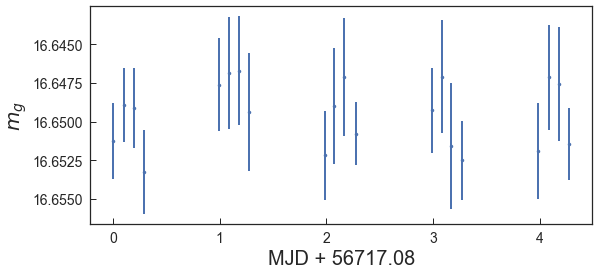

Blind14A_25_N27_0160_0355 raMedian     165.256371
decMedian     -4.870279
Name: Blind14A_25_N27_0160_0355, dtype: float64
raMedian            165.256
decMedian          -4.87028
X                   160.565
Y                   355.686
Var_Type                 NV
Mean                16.4223
Amplitude        0.00399858
Std              0.00211793
MedianAbsDev     0.00147444
Meanvariance    0.000128966
Eta_e               8.69893
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.990582
PeriodLS         0.00587245
Name: Blind14A_25_N27_0160_0355, dtype: object


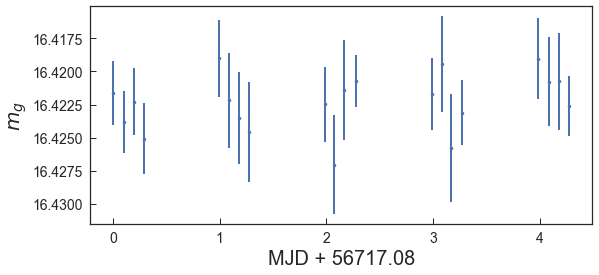

Blind14A_35_N24_1192_0288 raMedian     170.551638
decMedian     -0.589460
Name: Blind14A_35_N24_1192_0288, dtype: float64
raMedian            170.552
decMedian          -0.58946
X                   1192.67
Y                   288.049
Var_Type                 NV
Mean                17.7076
Amplitude        0.00342527
Std              0.00212029
MedianAbsDev     0.00126161
Meanvariance    0.000119739
Eta_e               9.14689
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999878
PeriodLS          0.0154797
Name: Blind14A_35_N24_1192_0288, dtype: object


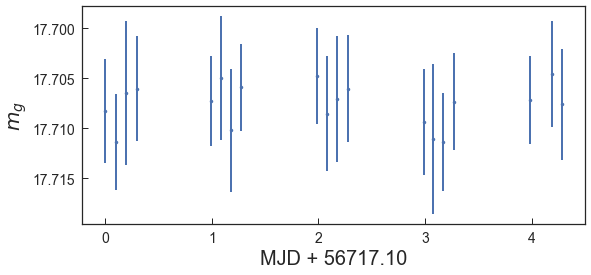

Blind14A_22_S27_0842_0317 raMedian     162.828272
decMedian      0.752886
Name: Blind14A_22_S27_0842_0317, dtype: float64
raMedian            162.828
decMedian          0.752886
X                   842.873
Y                   317.431
Var_Type                 NV
Mean                17.7026
Amplitude        0.00445823
Std              0.00225971
MedianAbsDev     0.00114439
Meanvariance    0.000127649
Eta_e               8.44622
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999442
PeriodLS          0.0130872
Name: Blind14A_22_S27_0842_0317, dtype: object


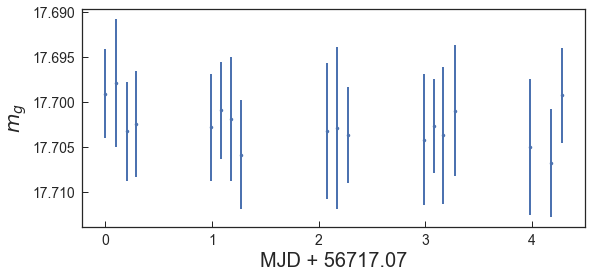

Blind14A_22_N31_0782_1961 raMedian     163.10219
decMedian     -0.88748
Name: Blind14A_22_N31_0782_1961, dtype: float64
raMedian           163.102
decMedian         -0.88748
X                  782.079
Y                  1961.56
Var_Type                NV
Mean               16.7662
Amplitude       0.00407772
Std             0.00229228
MedianAbsDev     0.0015919
Meanvariance    0.00013672
Eta_e              4.72521
spCl                  STAR
spSubCl                 G0
Z                      NaN
Period_fit        0.999768
PeriodLS         0.0146475
Name: Blind14A_22_N31_0782_1961, dtype: object


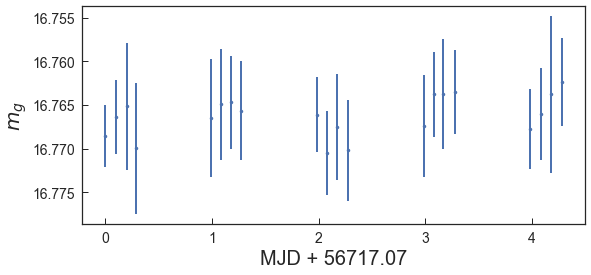

Blind14A_39_N18_1636_0225 raMedian     174.028302
decMedian     -2.552596
Name: Blind14A_39_N18_1636_0225, dtype: float64
raMedian            174.028
decMedian           -2.5526
X                    1636.2
Y                   225.241
Var_Type                 NV
Mean                16.0086
Amplitude         0.0040444
Std               0.0023101
MedianAbsDev     0.00175395
Meanvariance    0.000144303
Eta_e               6.48726
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.984849
PeriodLS         0.00711496
Name: Blind14A_39_N18_1636_0225, dtype: object


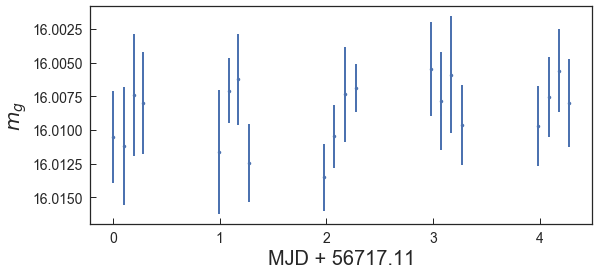

Blind14A_24_S17_1687_2303 raMedian     162.973438
decMedian     -3.829979
Name: Blind14A_24_S17_1687_2303, dtype: float64
raMedian           162.973
decMedian         -3.82998
X                  1687.85
Y                  2303.68
Var_Type                NV
Mean               16.9061
Amplitude       0.00467208
Std             0.00235873
MedianAbsDev    0.00172646
Meanvariance    0.00013952
Eta_e              8.40556
spCl                   NaN
spSubCl                NaN
Z                      NaN
Period_fit        0.997891
PeriodLS         0.0225618
Name: Blind14A_24_S17_1687_2303, dtype: object


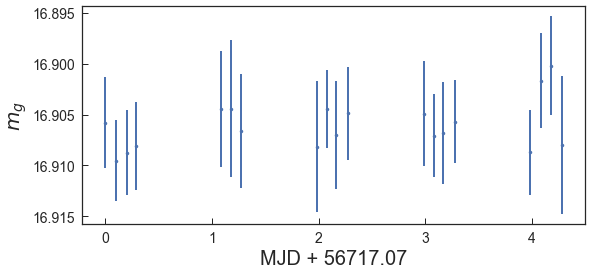

Blind14A_27_S13_1603_3532 raMedian     166.103593
decMedian      0.203418
Name: Blind14A_27_S13_1603_3532, dtype: float64
raMedian            166.104
decMedian          0.203418
X                   1603.11
Y                   3532.18
Var_Type                 NV
Mean                16.7705
Amplitude        0.00518488
Std              0.00236652
MedianAbsDev     0.00117884
Meanvariance    0.000141112
Eta_e               8.86439
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999866
PeriodLS         0.00707492
Name: Blind14A_27_S13_1603_3532, dtype: object


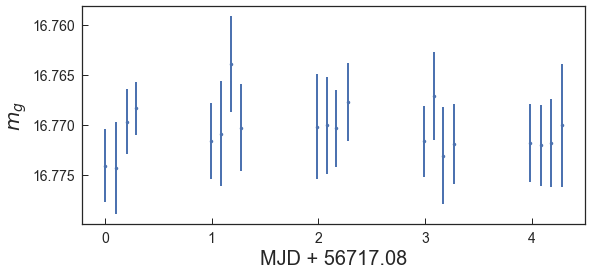

Blind14A_20_N20_1741_1505 raMedian     160.926536
decMedian      1.468401
Name: Blind14A_20_N20_1741_1505, dtype: float64
raMedian            160.927
decMedian            1.4684
X                   1741.84
Y                   1505.91
Var_Type                 NV
Mean                17.7263
Amplitude        0.00474632
Std              0.00237267
MedianAbsDev     0.00158482
Meanvariance    0.000133851
Eta_e               5.46143
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999988
PeriodLS         0.00708581
Name: Blind14A_20_N20_1741_1505, dtype: object


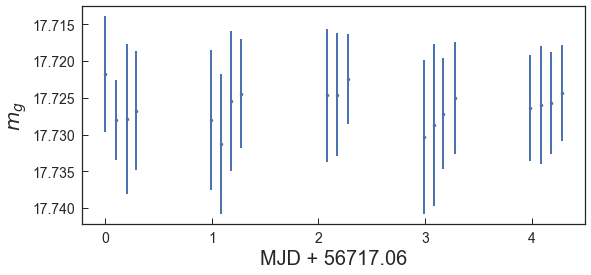

Blind14A_26_S12_0127_3733 raMedian     167.021295
decMedian     -1.785910
Name: Blind14A_26_S12_0127_3733, dtype: float64
raMedian            167.021
decMedian          -1.78591
X                    127.99
Y                   3733.18
Var_Type                 NV
Mean                17.7545
Amplitude        0.00523467
Std              0.00237664
MedianAbsDev    0.000997403
Meanvariance    0.000133861
Eta_e               7.09826
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit          0.97139
PeriodLS         0.00638798
Name: Blind14A_26_S12_0127_3733, dtype: object


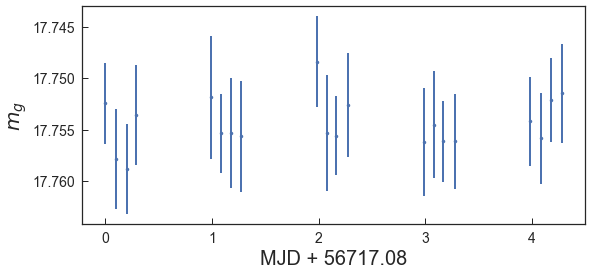

Blind14A_25_S6_1795_0928 raMedian     165.767056
decMedian     -4.167402
Name: Blind14A_25_S6_1795_0928, dtype: float64
raMedian            165.767
decMedian           -4.1674
X                   1795.51
Y                    928.23
Var_Type                 NV
Mean                16.9324
Amplitude        0.00436007
Std              0.00238129
MedianAbsDev     0.00145242
Meanvariance    0.000140635
Eta_e               7.87811
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.998738
PeriodLS          0.0376457
Name: Blind14A_25_S6_1795_0928, dtype: object


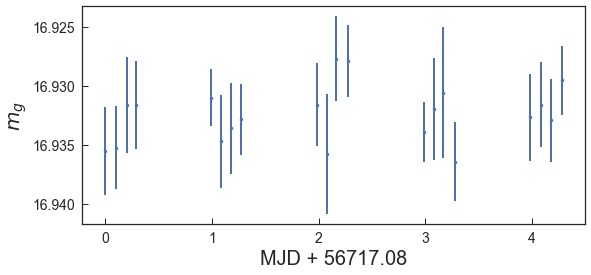

Blind14A_23_S22_0130_2698 raMedian     164.057514
decMedian     -1.455456
Name: Blind14A_23_S22_0130_2698, dtype: float64
raMedian            164.058
decMedian          -1.45546
X                   130.564
Y                   2698.85
Var_Type                 NV
Mean                 15.991
Amplitude        0.00368993
Std              0.00238447
MedianAbsDev     0.00198412
Meanvariance    0.000149113
Eta_e               8.63253
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.988311
PeriodLS           0.017302
Name: Blind14A_23_S22_0130_2698, dtype: object


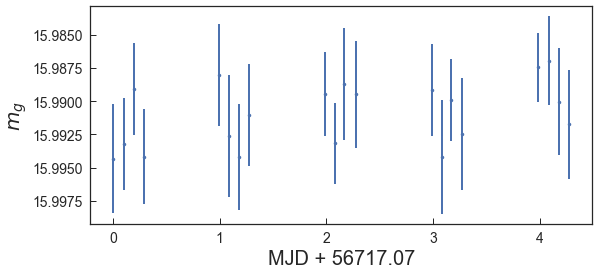

Blind14A_12_N10_1149_1999 raMedian     156.087766
decMedian     -9.827985
Name: Blind14A_12_N10_1149_1999, dtype: float64
raMedian            156.088
decMedian          -9.82798
X                   1149.26
Y                   1999.82
Var_Type                 NV
Mean                17.3198
Amplitude        0.00503656
Std              0.00241948
MedianAbsDev     0.00111407
Meanvariance    0.000139694
Eta_e               6.92227
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999858
PeriodLS          0.0080623
Name: Blind14A_12_N10_1149_1999, dtype: object


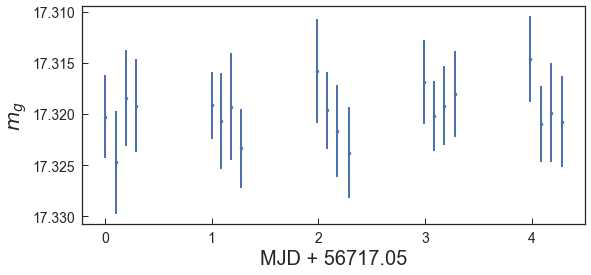

Blind14A_27_S6_1826_0804 raMedian     165.749951
decMedian      0.022995
Name: Blind14A_27_S6_1826_0804, dtype: float64
raMedian             165.75
decMedian         0.0229951
X                   1826.27
Y                   804.773
Var_Type                 NV
Mean                17.1863
Amplitude        0.00461661
Std              0.00242522
MedianAbsDev     0.00129299
Meanvariance    0.000141114
Eta_e               9.84659
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999904
PeriodLS            0.05812
Name: Blind14A_27_S6_1826_0804, dtype: object


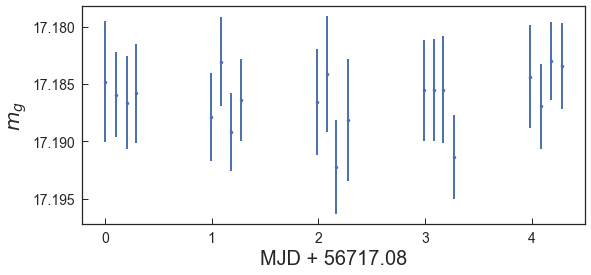

Blind14A_24_S18_1488_1745 raMedian     163.244112
decMedian     -3.815556
Name: Blind14A_24_S18_1488_1745, dtype: float64
raMedian            163.244
decMedian          -3.81556
X                   1488.13
Y                   1745.34
Var_Type                 NV
Mean                 16.947
Amplitude        0.00484617
Std              0.00242784
MedianAbsDev     0.00120544
Meanvariance    0.000143261
Eta_e               9.17063
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999944
PeriodLS          0.0120768
Name: Blind14A_24_S18_1488_1745, dtype: object


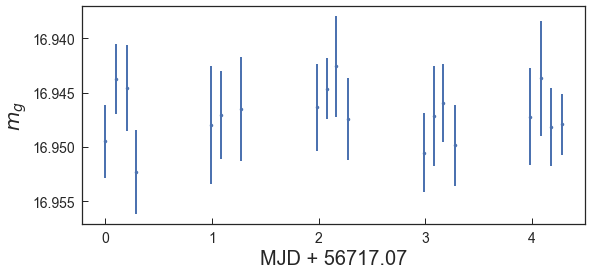

Blind14A_25_N27_1591_1746 raMedian     165.358212
decMedian     -4.974724
Name: Blind14A_25_N27_1591_1746, dtype: float64
raMedian            165.358
decMedian          -4.97472
X                   1591.89
Y                   1746.55
Var_Type                 NV
Mean                 17.211
Amplitude        0.00487368
Std               0.0024405
MedianAbsDev     0.00163059
Meanvariance    0.000141799
Eta_e               9.47823
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.997553
PeriodLS          0.0130592
Name: Blind14A_25_N27_1591_1746, dtype: object


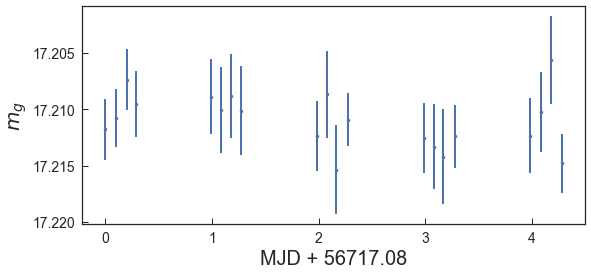

Blind14A_24_S23_1505_3431 raMedian     163.211726
decMedian     -3.652716
Name: Blind14A_24_S23_1505_3431, dtype: float64
raMedian            163.212
decMedian          -3.65272
X                   1505.02
Y                   3431.42
Var_Type                 NV
Mean                17.7049
Amplitude         0.0053008
Std              0.00244152
MedianAbsDev      0.0015031
Meanvariance    0.000137901
Eta_e               9.48946
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999675
PeriodLS         0.00731402
Name: Blind14A_24_S23_1505_3431, dtype: object


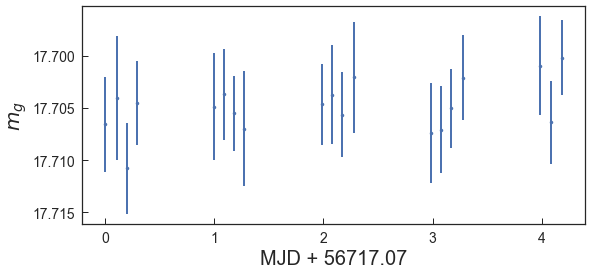

Blind14A_29_N10_1675_1612 raMedian     168.666497
decMedian      1.801650
Name: Blind14A_29_N10_1675_1612, dtype: float64
raMedian            168.666
decMedian           1.80165
X                   1675.15
Y                   1612.96
Var_Type                 NV
Mean                16.7032
Amplitude        0.00427383
Std              0.00244634
MedianAbsDev     0.00202528
Meanvariance    0.000146459
Eta_e               6.61795
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.961795
PeriodLS         0.00803724
Name: Blind14A_29_N10_1675_1612, dtype: object


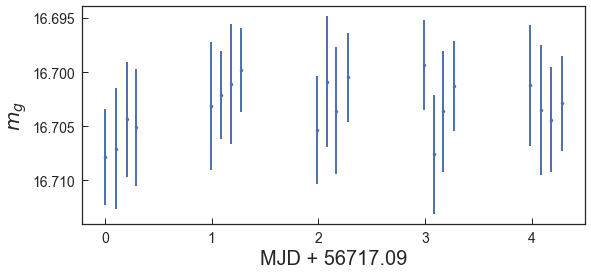

Blind14A_25_N14_1500_1126 raMedian     164.378263
decMedian     -4.637355
Name: Blind14A_25_N14_1500_1126, dtype: float64
raMedian            164.378
decMedian          -4.63736
X                   1500.37
Y                   1126.33
Var_Type                 NV
Mean                17.9112
Amplitude        0.00458681
Std              0.00247042
MedianAbsDev     0.00131689
Meanvariance    0.000137926
Eta_e               8.02212
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit          0.99866
PeriodLS          0.0178047
Name: Blind14A_25_N14_1500_1126, dtype: object


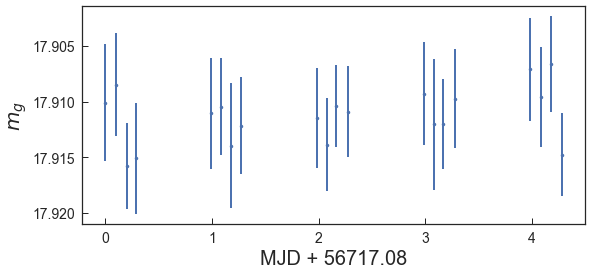

Blind14A_24_S23_1083_2841 raMedian     163.168533
decMedian     -3.621802
Name: Blind14A_24_S23_1083_2841, dtype: float64
raMedian            163.169
decMedian           -3.6218
X                   1083.65
Y                   2841.08
Var_Type                 NV
Mean                17.0175
Amplitude        0.00472419
Std              0.00248128
MedianAbsDev     0.00171784
Meanvariance    0.000145808
Eta_e               8.33358
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.992322
PeriodLS         0.00667065
Name: Blind14A_24_S23_1083_2841, dtype: object


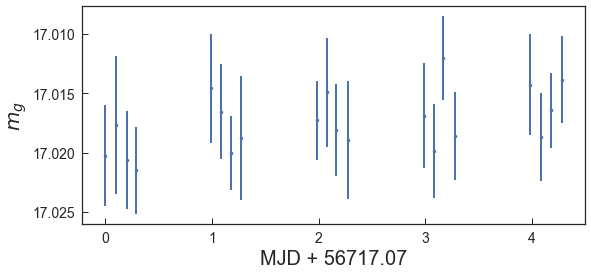

Blind14A_25_N27_1783_2767 raMedian     165.433045
decMedian     -4.988779
Name: Blind14A_25_N27_1783_2767, dtype: float64
raMedian            165.433
decMedian          -4.98878
X                   1783.96
Y                   2767.13
Var_Type                 NV
Mean                16.4892
Amplitude        0.00516711
Std              0.00248222
MedianAbsDev     0.00162372
Meanvariance    0.000150536
Eta_e                8.3211
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999991
PeriodLS          0.0419515
Name: Blind14A_25_N27_1783_2767, dtype: object


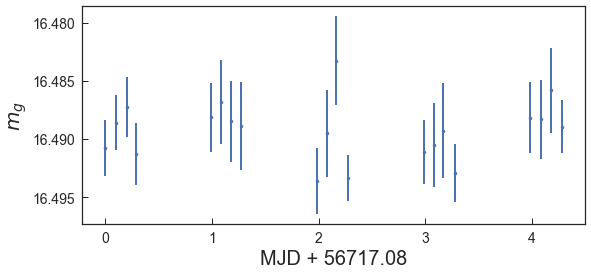

Blind14A_28_S8_0523_3219 raMedian     165.740259
decMedian      2.380200
Name: Blind14A_28_S8_0523_3219, dtype: float64
raMedian             165.74
decMedian            2.3802
X                   523.936
Y                   3219.35
Var_Type                 NV
Mean                17.9004
Amplitude        0.00471871
Std              0.00248309
MedianAbsDev     0.00205613
Meanvariance    0.000138717
Eta_e               7.61533
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999858
PeriodLS          0.0145459
Name: Blind14A_28_S8_0523_3219, dtype: object


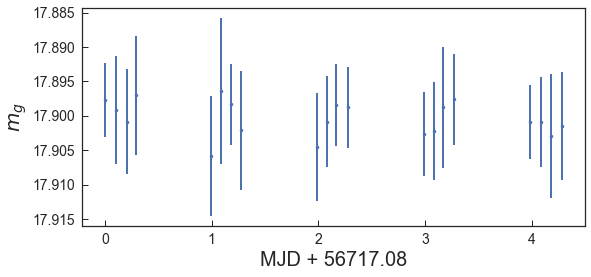

Blind14A_22_N22_1280_3630 raMedian     162.914104
decMedian     -0.595677
Name: Blind14A_22_N22_1280_3630, dtype: float64
raMedian            162.914
decMedian         -0.595677
X                   1280.34
Y                   3630.75
Var_Type                 NV
Mean                16.4642
Amplitude        0.00415631
Std              0.00249567
MedianAbsDev     0.00195304
Meanvariance    0.000151582
Eta_e                7.7868
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.995074
PeriodLS         0.00595065
Name: Blind14A_22_N22_1280_3630, dtype: object


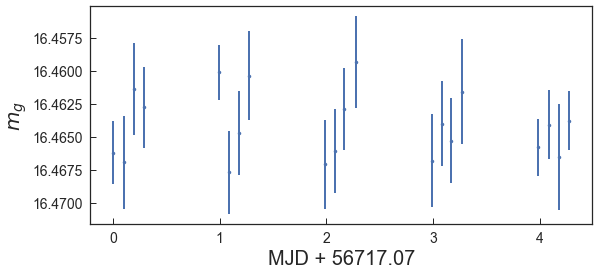

Blind14A_30_S8_1632_3046 raMedian     166.935505
decMedian      0.203074
Name: Blind14A_30_S8_1632_3046, dtype: float64
raMedian           166.936
decMedian         0.203074
X                  1632.61
Y                  3046.89
Var_Type                NV
Mean               17.0009
Amplitude       0.00512236
Std             0.00250389
MedianAbsDev    0.00127491
Meanvariance    0.00014728
Eta_e              5.23386
spCl                   NaN
spSubCl                NaN
Z                      NaN
Period_fit        0.969764
PeriodLS          0.011256
Name: Blind14A_30_S8_1632_3046, dtype: object


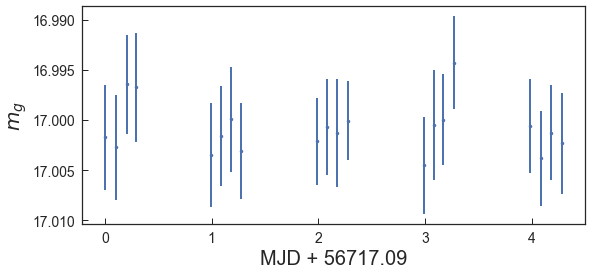

Blind14A_31_N19_0593_0962 raMedian     169.550845
decMedian     -2.476171
Name: Blind14A_31_N19_0593_0962, dtype: float64
raMedian            169.551
decMedian          -2.47617
X                   593.139
Y                   962.021
Var_Type                 NV
Mean                17.6621
Amplitude        0.00406137
Std              0.00251364
MedianAbsDev     0.00196994
Meanvariance    0.000142318
Eta_e               9.10517
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.991128
PeriodLS         0.00481898
Name: Blind14A_31_N19_0593_0962, dtype: object


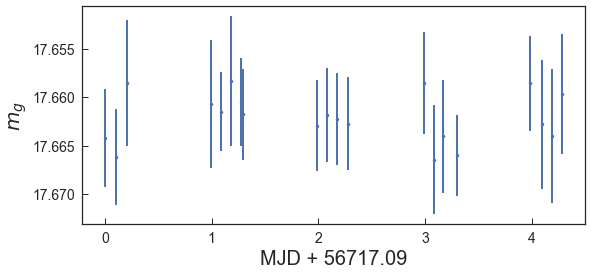

Blind14A_12_N10_0290_0068 raMedian     155.944449
decMedian     -9.764649
Name: Blind14A_12_N10_0290_0068, dtype: float64
raMedian            155.944
decMedian          -9.76465
X                   290.304
Y                   68.4397
Var_Type                 NV
Mean                 15.854
Amplitude        0.00497746
Std              0.00251978
MedianAbsDev      0.0017463
Meanvariance    0.000158936
Eta_e                6.9306
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999995
PeriodLS         0.00816222
Name: Blind14A_12_N10_0290_0068, dtype: object


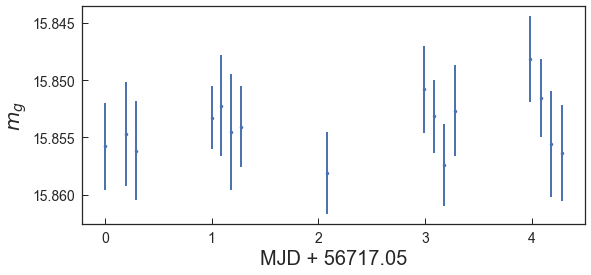

Blind14A_36_S14_1071_3218 raMedian     170.584274
decMedian      2.503299
Name: Blind14A_36_S14_1071_3218, dtype: float64
raMedian            170.584
decMedian            2.5033
X                   1071.33
Y                   3218.95
Var_Type                 NV
Mean                16.1359
Amplitude        0.00484688
Std              0.00252663
MedianAbsDev     0.00144144
Meanvariance    0.000156585
Eta_e               4.23905
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999914
PeriodLS           0.106999
Name: Blind14A_36_S14_1071_3218, dtype: object


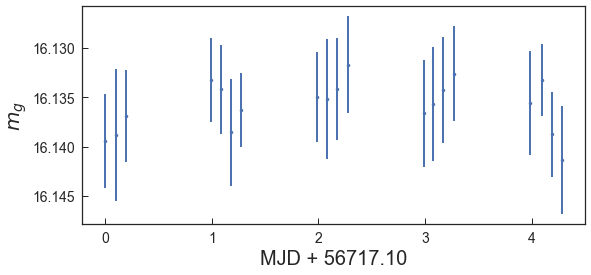

Blind14A_27_N15_0902_1252 raMedian     164.693301
decMedian     -0.402150
Name: Blind14A_27_N15_0902_1252, dtype: float64
raMedian            164.693
decMedian          -0.40215
X                   902.483
Y                   1252.84
Var_Type                 NV
Mean                16.9321
Amplitude         0.0048309
Std              0.00253207
MedianAbsDev     0.00153196
Meanvariance    0.000149543
Eta_e               7.28023
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.997334
PeriodLS         0.00507488
Name: Blind14A_27_N15_0902_1252, dtype: object


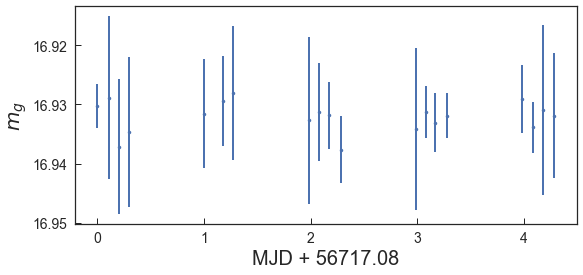

Blind14A_26_N19_0471_1191 raMedian     167.145446
decMedian     -2.468690
Name: Blind14A_26_N19_0471_1191, dtype: float64
raMedian            167.145
decMedian          -2.46869
X                   471.472
Y                   1191.73
Var_Type                 NV
Mean                15.9521
Amplitude        0.00530435
Std              0.00253983
MedianAbsDev     0.00127229
Meanvariance    0.000159216
Eta_e               9.85878
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999872
PeriodLS          0.0768662
Name: Blind14A_26_N19_0471_1191, dtype: object


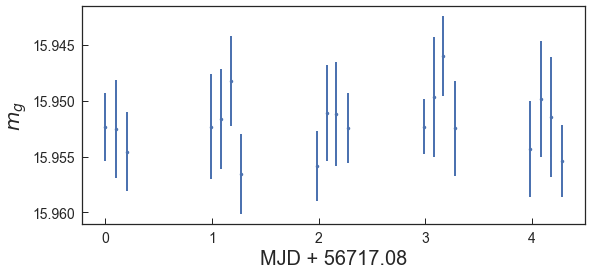

Blind14A_25_S5_1218_2379 raMedian     165.561701
decMedian     -4.125299
Name: Blind14A_25_S5_1218_2379, dtype: float64
raMedian           165.562
decMedian          -4.1253
X                  1218.22
Y                  2379.49
Var_Type                NV
Mean               17.9118
Amplitude       0.00438038
Std             0.00254814
MedianAbsDev    0.00261112
Meanvariance    0.00014226
Eta_e              8.34676
spCl                   NaN
spSubCl                NaN
Z                      NaN
Period_fit        0.952054
PeriodLS        0.00741604
Name: Blind14A_25_S5_1218_2379, dtype: object


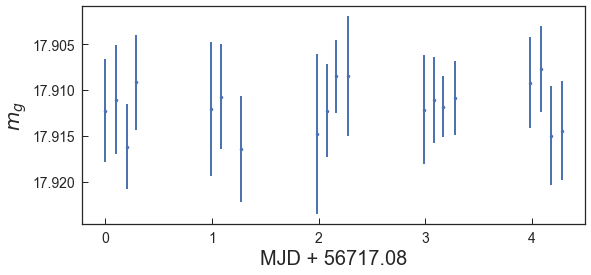

Blind14A_25_S17_1274_1451 raMedian     165.337734
decMedian     -3.799550
Name: Blind14A_25_S17_1274_1451, dtype: float64
raMedian            165.338
decMedian          -3.79955
X                   1274.49
Y                   1451.19
Var_Type                 NV
Mean                16.7186
Amplitude        0.00485886
Std              0.00256953
MedianAbsDev     0.00219325
Meanvariance    0.000153693
Eta_e               8.48799
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.939201
PeriodLS         0.00727731
Name: Blind14A_25_S17_1274_1451, dtype: object


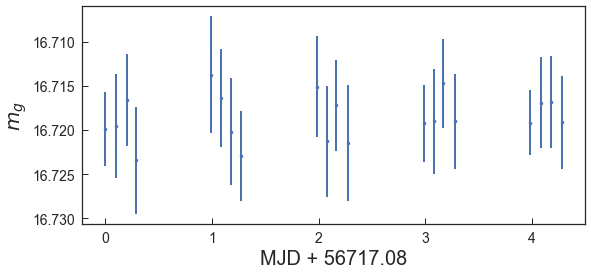

Blind14A_40_S15_1155_2722 raMedian     172.087238
decMedian     -3.789833
Name: Blind14A_40_S15_1155_2722, dtype: float64
raMedian            172.087
decMedian          -3.78983
X                   1155.51
Y                    2722.8
Var_Type                 NV
Mean                18.1977
Amplitude        0.00469281
Std              0.00257349
MedianAbsDev     0.00183937
Meanvariance    0.000141419
Eta_e               9.74108
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.984083
PeriodLS          0.0238447
Name: Blind14A_40_S15_1155_2722, dtype: object


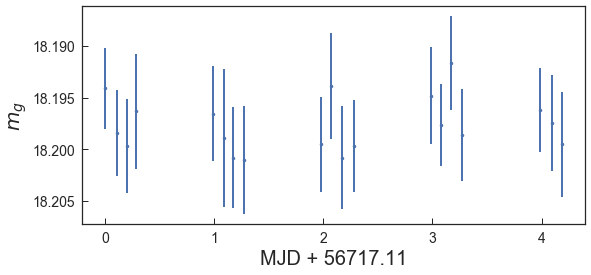

Blind14A_20_S3_0610_3199 raMedian     161.361213
decMedian      2.208521
Name: Blind14A_20_S3_0610_3199, dtype: float64
raMedian            161.361
decMedian           2.20852
X                   610.187
Y                   3199.78
Var_Type                 NV
Mean                16.3782
Amplitude        0.00508231
Std               0.0025739
MedianAbsDev     0.00169595
Meanvariance    0.000157154
Eta_e               7.44855
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999939
PeriodLS          0.0418906
Name: Blind14A_20_S3_0610_3199, dtype: object


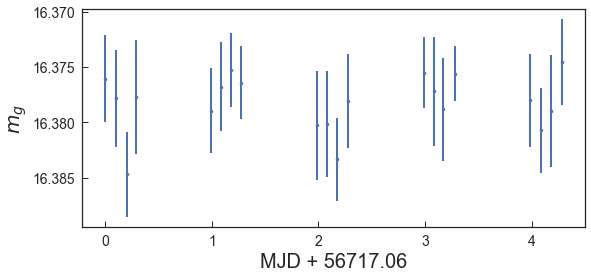

Blind14A_23_S23_1065_3003 raMedian     164.390470
decMedian     -1.524199
Name: Blind14A_23_S23_1065_3003, dtype: float64
raMedian             164.39
decMedian           -1.5242
X                   1065.18
Y                   3003.45
Var_Type                 NV
Mean                16.9316
Amplitude        0.00465593
Std              0.00257713
MedianAbsDev     0.00180342
Meanvariance    0.000152208
Eta_e               8.12118
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999996
PeriodLS         0.00472509
Name: Blind14A_23_S23_1065_3003, dtype: object


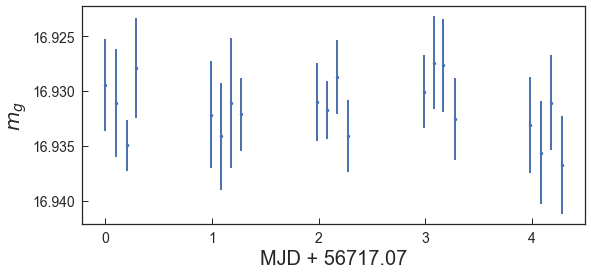

Blind14A_13_N10_1124_0779 raMedian     157.947153
decMedian     -9.055456
Name: Blind14A_13_N10_1124_0779, dtype: float64
raMedian            157.947
decMedian          -9.05546
X                    1124.2
Y                    779.52
Var_Type                 NV
Mean                16.3168
Amplitude        0.00506462
Std               0.0025826
MedianAbsDev      0.0017097
Meanvariance    0.000158279
Eta_e               5.76554
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999955
PeriodLS         0.00443467
Name: Blind14A_13_N10_1124_0779, dtype: object


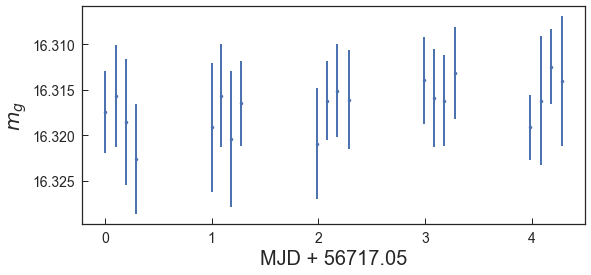

Blind14A_13_N31_1390_0269 raMedian     158.381440
decMedian     -9.732176
Name: Blind14A_13_N31_1390_0269, dtype: float64
raMedian            158.381
decMedian          -9.73218
X                   1390.63
Y                   269.022
Var_Type                 NV
Mean                16.0532
Amplitude        0.00433759
Std              0.00260734
MedianAbsDev     0.00167319
Meanvariance    0.000162419
Eta_e               8.25327
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999621
PeriodLS          0.0762184
Name: Blind14A_13_N31_1390_0269, dtype: object


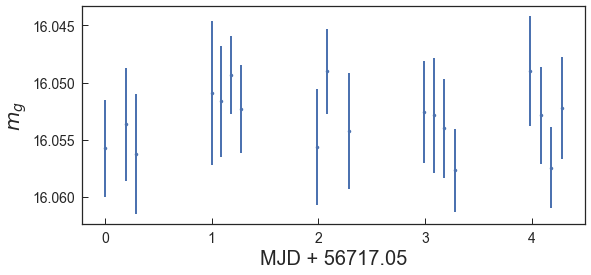

Blind14A_23_S1_1653_0557 raMedian     162.968285
decMedian     -2.059336
Name: Blind14A_23_S1_1653_0557, dtype: float64
raMedian            162.968
decMedian          -2.05934
X                   1653.55
Y                   557.649
Var_Type                 NV
Mean                16.3736
Amplitude        0.00498422
Std              0.00261071
MedianAbsDev       0.001568
Meanvariance    0.000159447
Eta_e               8.24913
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.997989
PeriodLS          0.0123621
Name: Blind14A_23_S1_1653_0557, dtype: object


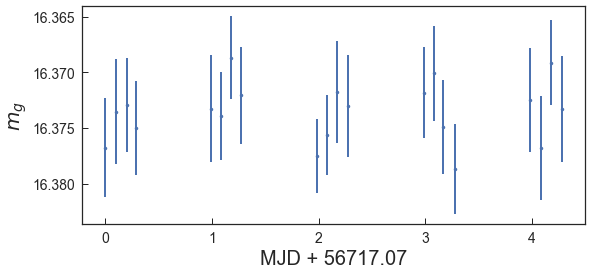

Blind14A_21_S20_0485_2812 raMedian     163.445274
decMedian      2.710783
Name: Blind14A_21_S20_0485_2812, dtype: float64
raMedian            163.445
decMedian           2.71078
X                   485.829
Y                   2812.29
Var_Type                 NV
Mean                15.6609
Amplitude        0.00475119
Std              0.00261811
MedianAbsDev      0.0016849
Meanvariance    0.000167175
Eta_e               3.32386
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.998888
PeriodLS         0.00533959
Name: Blind14A_21_S20_0485_2812, dtype: object


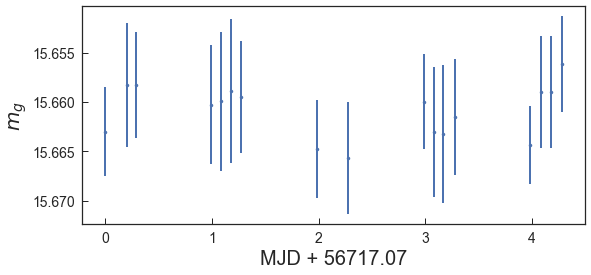

Blind14A_30_S31_1749_2795 raMedian     168.005270
decMedian      0.850872
Name: Blind14A_30_S31_1749_2795, dtype: float64
raMedian            168.005
decMedian          0.850872
X                    1749.9
Y                    2795.5
Var_Type                 NV
Mean                18.1614
Amplitude        0.00470725
Std              0.00262774
MedianAbsDev     0.00240249
Meanvariance    0.000144688
Eta_e               8.90986
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.994656
PeriodLS          0.0259195
Name: Blind14A_30_S31_1749_2795, dtype: object


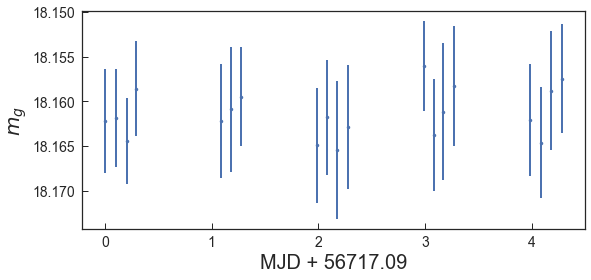

Blind14A_23_N16_0731_3056 raMedian     163.927005
decMedian     -2.487249
Name: Blind14A_23_N16_0731_3056, dtype: float64
raMedian           163.927
decMedian         -2.48725
X                  731.577
Y                  3056.98
Var_Type                NV
Mean               17.7415
Amplitude       0.00571612
Std             0.00263267
MedianAbsDev    0.00196045
Meanvariance    0.00014839
Eta_e              6.57935
spCl                   NaN
spSubCl                NaN
Z                      NaN
Period_fit        0.997068
PeriodLS        0.00480287
Name: Blind14A_23_N16_0731_3056, dtype: object


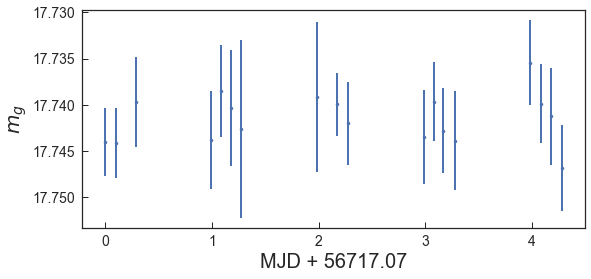

Blind14A_27_S6_0634_1683 raMedian     165.814289
decMedian      0.110123
Name: Blind14A_27_S6_0634_1683, dtype: float64
raMedian            165.814
decMedian          0.110123
X                   634.193
Y                    1683.7
Var_Type                 NV
Mean                16.2599
Amplitude        0.00498865
Std               0.0026377
MedianAbsDev     0.00189711
Meanvariance    0.000162222
Eta_e               7.45223
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.998293
PeriodLS         0.00852324
Name: Blind14A_27_S6_0634_1683, dtype: object


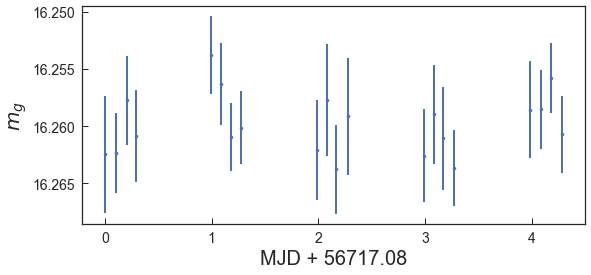

Blind14A_17_S8_1330_2820 raMedian     159.650936
decMedian     -3.968061
Name: Blind14A_17_S8_1330_2820, dtype: float64
raMedian            159.651
decMedian          -3.96806
X                   1330.69
Y                   2820.34
Var_Type                 NV
Mean                16.3741
Amplitude        0.00505249
Std              0.00265414
MedianAbsDev     0.00182209
Meanvariance    0.000162093
Eta_e               4.59219
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999303
PeriodLS           0.005673
Name: Blind14A_17_S8_1330_2820, dtype: object


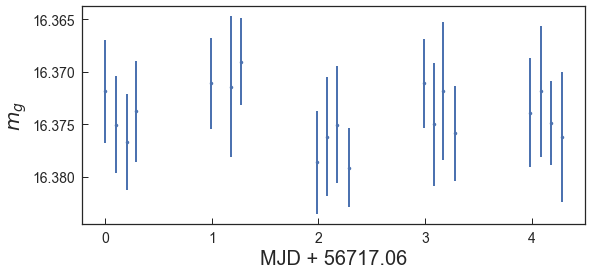

Blind14A_29_S9_0171_1641 raMedian     168.358084
decMedian      2.405851
Name: Blind14A_29_S9_0171_1641, dtype: float64
raMedian            168.358
decMedian           2.40585
X                   171.918
Y                   1641.63
Var_Type                 NV
Mean                16.9517
Amplitude        0.00474521
Std              0.00265897
MedianAbsDev     0.00230067
Meanvariance    0.000156856
Eta_e               7.42771
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999925
PeriodLS         0.00920352
Name: Blind14A_29_S9_0171_1641, dtype: object


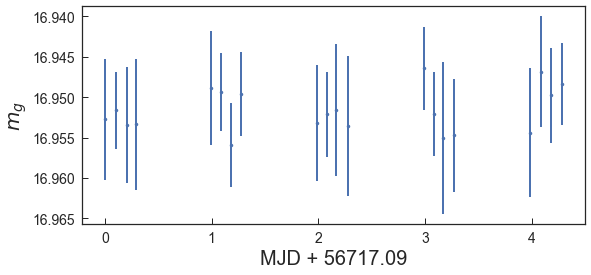

Blind14A_18_N19_1782_0347 raMedian     162.240519
decMedian     -2.562854
Name: Blind14A_18_N19_1782_0347, dtype: float64
raMedian            162.241
decMedian          -2.56285
X                   1782.73
Y                   347.306
Var_Type                 NV
Mean                16.7572
Amplitude        0.00476748
Std              0.00266987
MedianAbsDev     0.00198522
Meanvariance    0.000159326
Eta_e               6.42546
spCl                    NaN
spSubCl                 NaN
Z                       NaN
Period_fit         0.999773
PeriodLS          0.0285659
Name: Blind14A_18_N19_1782_0347, dtype: object


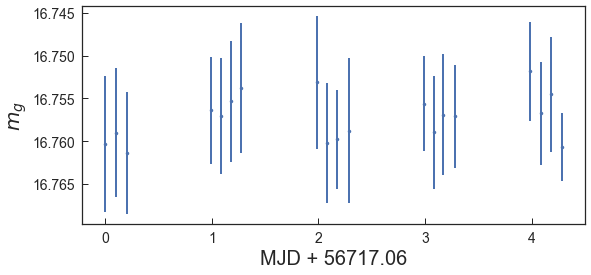

In [35]:
ls = []
periodogram = True
#for idx, row in table_15.sort_values(['Pred_Var_Type', 'Pred_proba'],ascending=False).iterrows():
#for idx, row in qso.sort_values('PeriodLS', ascending=True).head().iterrows():
for idx, row in qso.query('Var_Type == "NV"').sort_values('Std', ascending=True).head(50).iterrows():
    #if idx != 'Blind15A_21_N21_1122_2101': continue
    print '\r',idx,
    label = row['Var_Type']
    print row[['raMedian','decMedian']].astype(float)
    print row[['raMedian','decMedian','X','Y','Var_Type','Mean','Amplitude',
               'Std','MedianAbsDev','Meanvariance','Eta_e', 'spCl','spSubCl','Z','Period_fit','PeriodLS']]
    T = float(row['PeriodLS'])
    T_W = float(row['PeriodLS'])
    T_G = float(row['PeriodGLS'])
    field, CCD, X, Y = re.findall(
            r'(\w+\d+\w?\_\d\d?)\_(\w\d+?)\_(\d+)\_(\d+)', idx)[0]
    #try:
    time, mag, err, epoch = give_me_lc(field, CCD, X, Y, extract=False)
    #continue
    #except:
    #    print 'fail during LC read'
    #    continue
    #continue
    
    goods = np.where(mag>=15.)
    time = time[goods]
    mag = mag[goods]
    err = err[goods]
    
    filtered_data = sigma_clip(mag, sigma=3, iters=3,
                           cenfunc=np.mean, copy=False)
    time = time[~filtered_data.mask]
    mag = mag[~filtered_data.mask]
    err = err[~filtered_data.mask]
    epoch = epoch[~filtered_data.mask]
    #print 'clipped: ', np.sum(filtered_data.mask)
    
    t_aux = time[time - time.min() < 6]
    ls.append(np.median(t_aux[3:] - t_aux[:-3]))
    
    if label in ['RRLYR','EB','DSCT','ZZ','ROTVAR']:
    #if True:
        
        fig = plt.figure(figsize=(16,8))
        gs = gridspec.GridSpec(2,2)
        ax1 = fig.add_subplot(gs[0,0])
        ax2 = fig.add_subplot(gs[0,1])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
            
        # LC 
        ax1.errorbar(time, mag, yerr=err, fmt='b*', label='sig_clip')
        ax1.set_xlabel('time')
        
        if label in ['EB'] :
            T *= 2
            T_W *= 2
            T_G *= 2
        # phase LC from LS
        phase1 = np.mod(time, T) / T
        sort_idx1 = np.argsort(phase1)
        PHASE = np.hstack([phase1[sort_idx1], phase1[sort_idx1]+1.])
        MAG = np.hstack([mag[sort_idx1],mag[sort_idx1]])
        ERR = np.hstack([err[sort_idx1],err[sort_idx1]])
        
        ax2.errorbar(PHASE-1, MAG, yerr=ERR, fmt='g*', label='LS')
        ax2.text(0.1, 0.1,'LS',fontsize=16,ha='left', va='top', transform=ax2.transAxes)
        
        phase_W = np.mod(time, T_W) / T_W
        sort_idx_W = np.argsort(phase_W)
        PHASE_W = np.hstack([phase_W[sort_idx_W], phase_W[sort_idx_W]+1.])
        MAG_W = np.hstack([mag[sort_idx_W],mag[sort_idx_W]])
        ERR_W = np.hstack([err[sort_idx_W],err[sort_idx_W]])
        
        ax3.errorbar(PHASE_W-1, MAG_W, yerr=ERR_W, fmt='b*', alpha=1, ms=8)
        ax3.text(0.1, 0.1,'WMCC',fontsize=16,ha='left', va='top', transform=ax3.transAxes)
        ax3.set_xlabel('phase', fontsize=15)
        ax3.set_ylabel('g', fontsize=15)
        
        phase_G = np.mod(time, T_G) / T_G
        sort_idx_G = np.argsort(phase_G)
        PHASE_G = np.hstack([phase_G[sort_idx_G], phase_G[sort_idx_G]+1.])
        MAG_G = np.hstack([mag[sort_idx_G],mag[sort_idx_G]])
        ERR_G = np.hstack([err[sort_idx_G],err[sort_idx_G]])
        
        ax4.errorbar(PHASE_G-1, MAG_G, yerr=ERR_G, fmt='b*', alpha=1, ms=8)
        ax4.text(0.1, 0.1,'GLS',fontsize=16,ha='left', va='top', transform=ax4.transAxes)
        ax4.set_xlabel('phase', fontsize=15)
        ax4.set_ylabel('g', fontsize=15) 
            
        ax1.set_ylabel('g', fontsize=15)
        ax1.set_xlabel('MJD', fontsize=15)
        ax2.set_ylabel('g', fontsize=15)
        ax2.set_xlabel('phase', fontsize=15)
        ax1.invert_yaxis()
        ax2.invert_yaxis()
        ax3.invert_yaxis()
        ax4.invert_yaxis()
        plt.show()
        
    else:
        
        C_EK, C_EK_err, bins = ACF_EK(time - time.min(), mag, err,
                                      bins=np.linspace(0, 4, 101))
        t_EK = 0.5 * (bins[1:] + bins[:-1])
        
        ts_acf = acf(mag)
        
        fig, ax = plt.subplots(ncols=1, nrows=1,figsize = (9,4))

        ax.errorbar(time - time.min(), mag, yerr=err, fmt='b.', lw=2.)
        if np.max(time - time.min()) > 10:
            ax.set_xlim(-0.1, 6.)
        ax.set_xlabel('MJD + %.2f' % time.min(), size=20)
        ax.set_ylabel('$m_g$', size=20)
        ax.invert_yaxis()
        
        #ax[1].errorbar(t_EK, C_EK, C_EK_err, fmt='.k', lw=1,
        #            label='Edelson-Krolik')
        #ax[1].fill_between(t_EK, 0, C_EK_err*3., alpha=.3)
        #ax[1].fill_between(t_EK, 0, -C_EK_err*3., alpha=.3)
        #ax[1].plot(ts_acf, '.k', ms=10)
        #ax[1].legend(loc=3)
        #ax[1].axhline(0, ls=':', lw=1, c='gray')
        #
        #ax[1].set_xlabel('t (days)')
        #ax[1].set_ylabel('ACF(t)')
        plt.show()

In [50]:
print np.median(ls)

0.860832500002
